# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid=9b3de5aac62bed7405e275fd7ca5d125&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | usogorsk
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | tshabong
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | rankweil
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | nashtarud
City not found. Skipping...
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | ola
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 o

Processing Record 39 of Set 4 | flin flon
Processing Record 40 of Set 4 | den burg
Processing Record 41 of Set 4 | poronaysk
Processing Record 42 of Set 4 | trinity beach
Processing Record 43 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 44 of Set 4 | yaren
Processing Record 45 of Set 4 | khabarovsk
Processing Record 46 of Set 4 | talcahuano
Processing Record 47 of Set 4 | happy valley-goose bay
Processing Record 48 of Set 4 | saratamata
City not found. Skipping...
Processing Record 49 of Set 4 | chonchi
Processing Record 0 of Set 5 | loango
Processing Record 1 of Set 5 | alo
Processing Record 2 of Set 5 | egilsstadir
Processing Record 3 of Set 5 | barcelos
Processing Record 4 of Set 5 | vila do maio
Processing Record 5 of Set 5 | alofi
Processing Record 6 of Set 5 | muisne
Processing Record 7 of Set 5 | undurkhaan
Processing Record 8 of Set 5 | yuzhno-kurilsk
Processing Record 9 of Set 5 | borogontsy
Processing Record 10 of Set 5 | cururupu
Processing Reco

Processing Record 31 of Set 8 | lusambo
Processing Record 32 of Set 8 | tangalle
Processing Record 33 of Set 8 | watampone
Processing Record 34 of Set 8 | markovo
Processing Record 35 of Set 8 | victoria falls
Processing Record 36 of Set 8 | bikenibeu village
Processing Record 37 of Set 8 | san julian
Processing Record 38 of Set 8 | mar del plata
Processing Record 39 of Set 8 | kumeny
Processing Record 40 of Set 8 | suklayin
Processing Record 41 of Set 8 | novoanninskiy
Processing Record 42 of Set 8 | kone
Processing Record 43 of Set 8 | shanghai
Processing Record 44 of Set 8 | mil'kovo
Processing Record 45 of Set 8 | paragominas
Processing Record 46 of Set 8 | ocean shores
Processing Record 47 of Set 8 | irymple
Processing Record 48 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 49 of Set 8 | guatrache
Processing Record 0 of Set 9 | banamba
Processing Record 1 of Set 9 | koster
Processing Record 2 of Set 9 | okhotsk
Processing Record 3 of Set 9 | formosa do rio preto

Processing Record 21 of Set 12 | cascais
Processing Record 22 of Set 12 | hoopstad
Processing Record 23 of Set 12 | zabid
Processing Record 24 of Set 12 | masterton
Processing Record 25 of Set 12 | yungay
Processing Record 26 of Set 12 | santana
Processing Record 27 of Set 12 | panjakent
Processing Record 28 of Set 12 | chui
Processing Record 29 of Set 12 | ambon
Processing Record 30 of Set 12 | kaa-khem
Processing Record 31 of Set 12 | cozumel
Processing Record 32 of Set 12 | hirara
Processing Record 33 of Set 12 | nova sintra
Processing Record 34 of Set 12 | biritiba mirim
Processing Record 35 of Set 12 | orkney
Processing Record 36 of Set 12 | byron bay
Processing Record 37 of Set 12 | ebon
Processing Record 38 of Set 12 | james island
City not found. Skipping...
Processing Record 39 of Set 12 | juneau
Processing Record 40 of Set 12 | antsiranana
Processing Record 41 of Set 12 | mezgor'e
City not found. Skipping...
Processing Record 42 of Set 12 | vedaraniyam
Processing Record 43 of

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,41.31,75,58,8.57,IS,1686091485
1,grytviken,-54.2811,-36.5092,36.50,96,90,4.56,GS,1686091476
2,port mathurin,-19.6833,63.4167,76.87,65,25,20.69,MU,1686091477
3,anadyr,64.7500,177.4833,52.30,62,20,22.37,RU,1686091474
4,usogorsk,63.4106,48.6872,38.28,92,34,5.19,RU,1686091517


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,41.31,75,58,8.57,IS,1686091485
1,grytviken,-54.2811,-36.5092,36.50,96,90,4.56,GS,1686091476
2,port mathurin,-19.6833,63.4167,76.87,65,25,20.69,MU,1686091477
3,anadyr,64.7500,177.4833,52.30,62,20,22.37,RU,1686091474
4,usogorsk,63.4106,48.6872,38.28,92,34,5.19,RU,1686091517


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

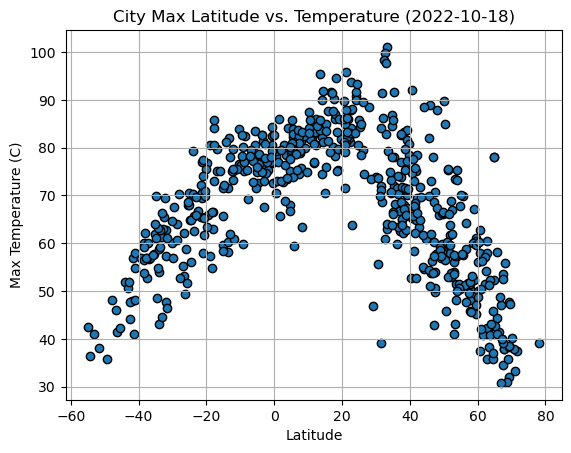

In [36]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

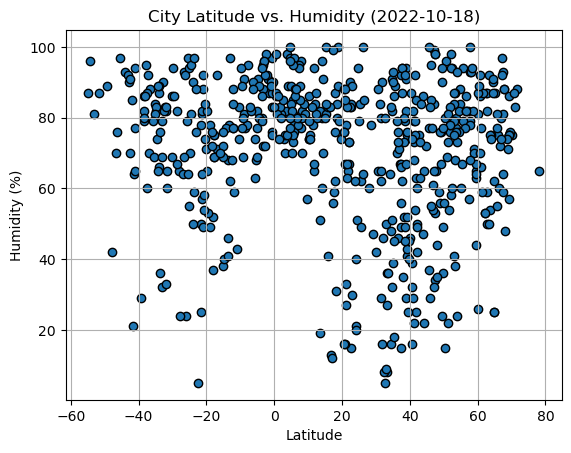

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

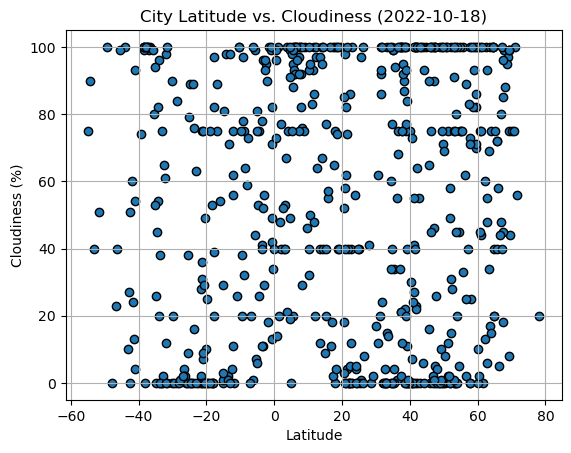

In [38]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

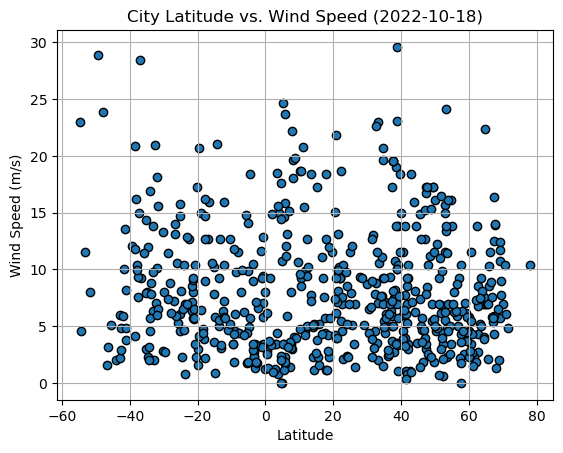

In [39]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    plt.scatter(x_values, y_values)
    
    plt.plot(x_values, regress_values, color ="red")
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.text(0.4 * (min(x_values) + max(x_values)), 0.9 * (min(y_values) + max(y_values)), f"r-value = {round(rvalue, 2)}")

    
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,41.31,75,58,8.57,IS,1686091485
3,anadyr,64.7500,177.4833,52.30,62,20,22.37,RU,1686091474
4,usogorsk,63.4106,48.6872,38.28,92,34,5.19,RU,1686091517
5,albany,42.6001,-73.9662,63.34,75,55,1.01,US,1686091473
8,rankweil,47.2764,9.6303,60.28,84,46,3.00,AT,1686091887


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,36.50,96,90,4.56,GS,1686091476
2,port mathurin,-19.6833,63.4167,76.87,65,25,20.69,MU,1686091477
6,tshabong,-26.0500,22.4500,58.87,24,0,10.54,BW,1686091887
7,adamstown,-25.0660,-130.1015,70.54,55,79,14.70,PN,1686091476
9,edinburgh of the seven seas,-37.0676,-12.3116,56.68,70,99,28.45,SH,1686091474


###  Temperature vs. Latitude Linear Regression Plot

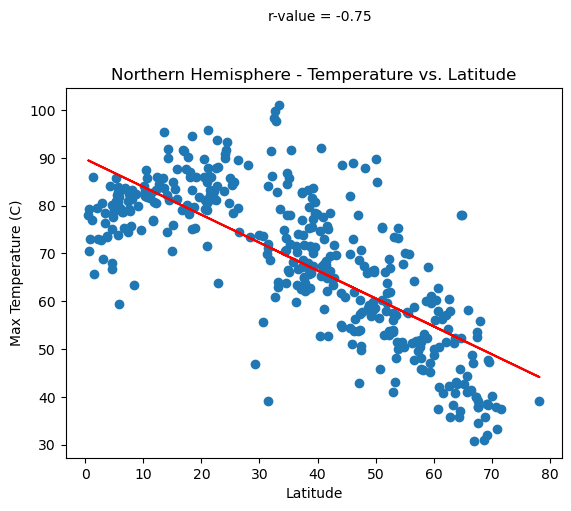

In [43]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Northern Hemisphere - Temperature vs. Latitude', 'Latitude', 'Max Temperature (C)')
# plt.show()

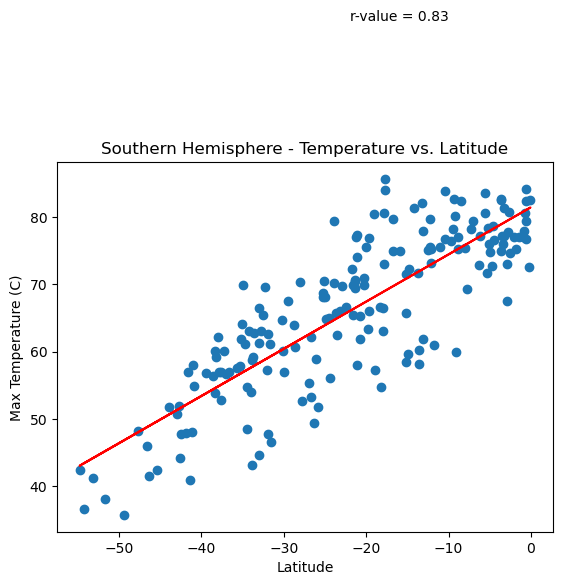

In [44]:
# Linear regression on Southern Hemisphere

plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Southern Hemisphere - Temperature vs. Latitude', 'Latitude', 'Max Temperature (C)')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

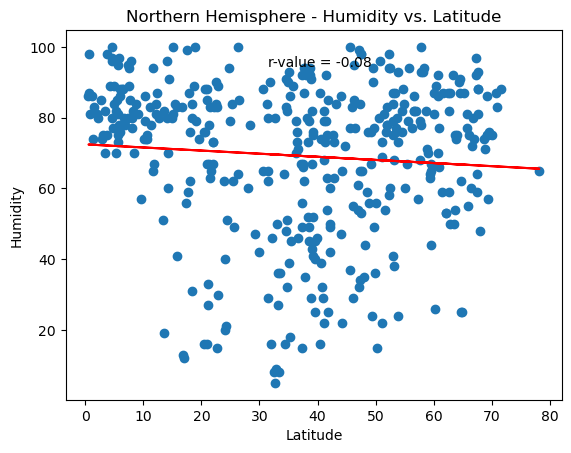

In [48]:
# Northern Hemisphere

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Northern Hemisphere - Humidity vs. Latitude', 'Latitude', 'Humidity')
plt.show()

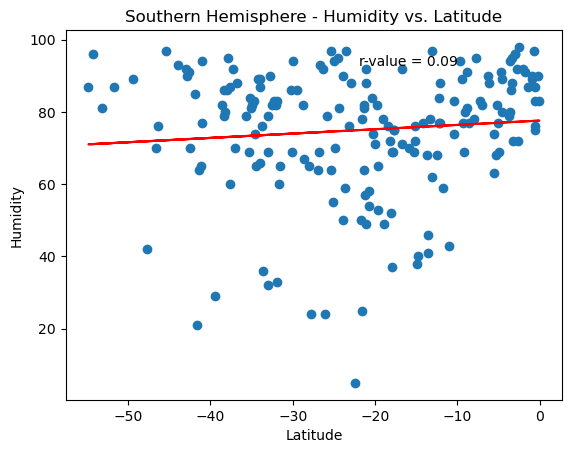

In [49]:
# Southern Hemisphere


plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Southern Hemisphere - Humidity vs. Latitude', 'Latitude', 'Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

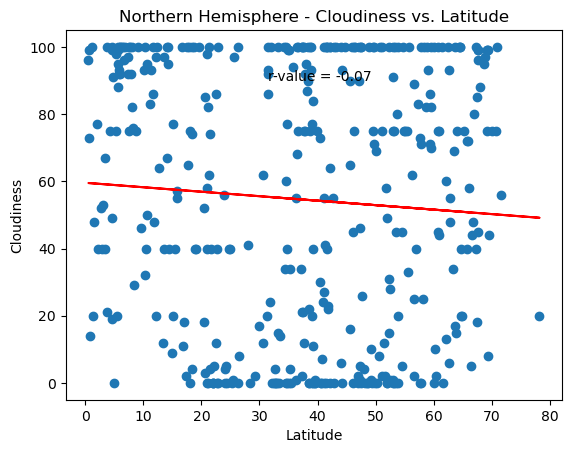

In [50]:
# Northern Hemisphere

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Northern Hemisphere - Cloudiness vs. Latitude', 'Latitude', 'Cloudiness')


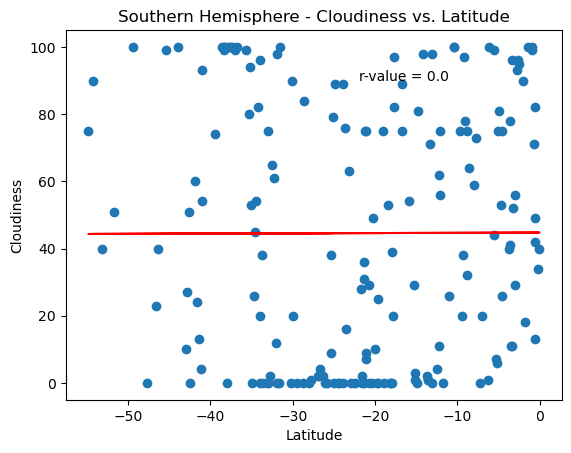

In [51]:
# Southern Hemisphere

plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Southern Hemisphere - Cloudiness vs. Latitude', 'Latitude', 'Cloudiness')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

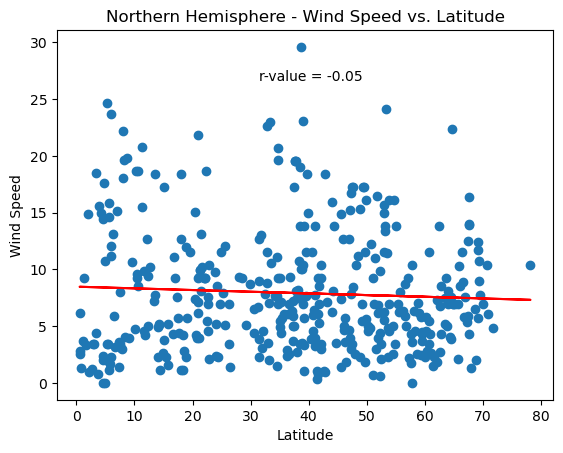

In [52]:
# Northern Hemisphere

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Northern Hemisphere - Wind Speed vs. Latitude', 'Latitude', 'Wind Speed')


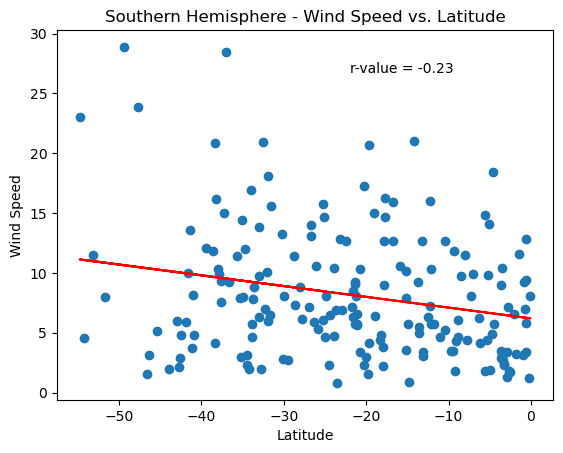

In [53]:
# Southern Hemisphere

plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Southern Hemisphere - Wind Speed vs. Latitude', 'Latitude', 'Wind Speed')


**Discussion about the linear relationship:** YOUR RESPONSE HERE